<h1><center> NeuroML-DB Analysis - Data Wrangling and Preprocessing of Channel Models for Clustering <h1><center>

<u>Notes</u>:

> This notebook contains scripts for gathering channel models from the database used for initial clustering in <b>channel_clustering.ipynb</b>.
> 
> The primary objective here is to gather neurons and get them into the form necessary to reproduce the clustering protocols used in the ICGenealogy database (another channel model database).

In [1]:
# general modules
from ast import literal_eval
import pandas as pd
import numpy as np
import requests
import xml.etree.ElementTree as ET
import os
from os.path import join, isfile
from collections import OrderedDict

# analysis modules
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean as dist

# viz modules
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import pprint as pp
from pprint import pprint

# local project modules
from utils.wrangle import *
from analyses.clustering import *
from figures.visualization import *

%matplotlib inline
%load_ext autoreload
%autoreload 2


In [2]:
cwd = os.getcwd()

path2data = join(cwd,'data')
print(path2data)



/Users/vrhaynes/Desktop/research/data_analysis/meta/LargeScaleModelAnalysis_2019/data


## Gather channel models from NeuroML-DB

Grab all models with id NMLCHXXXXXX. Results in N=183 models with unique NMLCH tags


In [7]:
keyword_search = query_model_by_keyword('"Type":"Channel"') # randomly returns 25 of these

In [8]:
pprint(keyword_search)

[{u'Author_Count': 8,
  u'First_Author': u'Berg',
  u'Model_ID': u'NMLCH001487',
  u'Name': u'KCa SK Type Calcium Dependent Potassium',
  u'Publication_Year': 2018,
  u'Rank': u'13',
  u'Second_Author': u'Feng',
  u'Type': u'Channel'},
 {u'Author_Count': 3,
  u'First_Author': None,
  u'Model_ID': u'NMLCH000002',
  u'Name': u'IA A Type Potassium Channel for Distal Dendrites',
  u'Publication_Year': 2005,
  u'Rank': u'13',
  u'Second_Author': u'Ferrante',
  u'Type': u'Channel'},
 {u'Author_Count': 4,
  u'First_Author': None,
  u'Model_ID': u'NMLCH000151',
  u'Name': u'KCa AHP Type Calcium Dependent Potassium',
  u'Publication_Year': 2003,
  u'Rank': u'13',
  u'Second_Author': u'Buhl',
  u'Type': u'Channel'},
 {u'Author_Count': 10,
  u'First_Author': None,
  u'Model_ID': u'NMLCH000144',
  u'Name': u'CaT T Type Transient Low Threshold Inactivating Calcium',
  u'Publication_Year': 2005,
  u'Rank': u'13',
  u'Second_Author': u'Contreras',
  u'Type': u'Channel'},
 {u'Author_Count': 3,
  u'Fir

### Single channel demo

In [1]:
NMLDB_ID = 'NMLCH000001'

In [10]:
example_channel_model = get_channel_model_details(NMLDB_ID)

In [11]:
example_channel_model


{u'children': [],
 u'complexity': {u'cvode_spikes_vs_steps': [], u'dt_sensitivity': []},
 u'ephyz_clusters': [],
 u'keywords': [],
 u'model': {u'AP12AHPDepthPercentChange': None,
  u'AP12AmplitudeChangePercent': None,
  u'AP12AmplitudeDrop': None,
  u'AP12HalfWidthChangePercent': None,
  u'AP12RateOfChangePeakToTroughPercentChange': None,
  u'AP1AHPDepth': None,
  u'AP1Amplitude': None,
  u'AP1DelayMean': None,
  u'AP1DelayMeanStrongStim': None,
  u'AP1DelaySD': None,
  u'AP1DelaySDStrongStim': None,
  u'AP1RateOfChangePeakToTrough': None,
  u'AP1SSAmplitudeChange': None,
  u'AP1WidthHalfHeight': None,
  u'AP1WidthPeakToTrough': None,
  u'AP2AHPDepth': None,
  u'AP2Amplitude': None,
  u'AP2DelayMean': None,
  u'AP2DelayMeanStrongStim': None,
  u'AP2DelaySD': None,
  u'AP2DelaySDStrongStim': None,
  u'AP2RateOfChangePeakToTrough': None,
  u'AP2WidthHalfHeight': None,
  u'AP2WidthPeakToTrough': None,
  u'AccommodationAtSSMean': None,
  u'AccommodationRateMeanAtSS': None,
  u'Accommodatio

In [12]:
example_channel_model.keys()

[u'publication',
 u'versions',
 u'ephyz_clusters',
 u'waveform_list',
 u'complexity',
 u'references',
 u'neurolex_ids',
 u'keywords',
 u'parents',
 u'model',
 u'similar_cells',
 u'children']

In [13]:
example_channel_model['model']['Channel_Type']

u'Ih'

In [14]:
example_channel_model['neurolex_ids']

[{u'Comments': None,
  u'NeuroLex_ID': 3000004,
  u'NeuroLex_Term': u'Hyperpolarization Activated Cyclic Nucleotide Gated Channel, HCN',
  u'NeuroLex_URI': u'nifext_2516'},
 {u'Comments': None,
  u'NeuroLex_ID': 3001803,
  u'NeuroLex_Term': u'I h, Inward rectifier, Anomalous Rectifier, Funny Current, Hyperpolarization Activated, Mixed Cation Current',
  u'NeuroLex_URI': u'oen_0001301'}]

In [15]:
example_channel_model['parents']

[{u'CVODE_Benchmark_RunTime': 183.05165891276184,
  u'CVODE_baseline_step_frequency': 13583.6054159521,
  u'CVODE_steps_per_spike': 373.497044412559,
  u'Directory_Path': u'/var/www/NeuroMLmodels/NMLCL000001',
  u'Equations': 27019,
  u'Errors': None,
  u'File': u'/var/www/NeuroMLmodels/NMLCL000001/CA1.cell.nml',
  u'File_MD5_Checksum': u'98ef18b8d4e5b86e918b25e472b42c7c',
  u'File_Name': u'CA1.cell.nml',
  u'File_Updated': u'2017-05-09T00:00:00-07:00',
  u'ID_Helper': 140,
  u'Max_Stable_DT': 0.03125,
  u'Max_Stable_DT_Benchmark_RunTime': 202.9376941568717,
  u'Max_Stable_DT_Error': 4.23593477303011,
  u'Model_ID': u'NMLCL000001',
  u'Name': u'CA1 Pyramidal Cell',
  u'Notes': u'None',
  u'Optimal_DT': 0.00552569485506138,
  u'Optimal_DT_Benchmark_RunTime': 1147.6932962726542,
  u'Optimal_DT_Error': 1.97487775905919,
  u'Optimal_DT_a': 0.000961538461538461,
  u'Optimal_DT_b': 31.4914649639909,
  u'Optimal_DT_c': 0.134350854947566,
  u'Publication_ID': 6000001,
  u'Runtime_Per_Step': 0.

In [16]:
example_channel_model['model']['Name']

u'Ih Hyperpolarization Activated Cation'

In [18]:
# all waveforms models were subjected to
example_channel_model['waveform_list']

[{u'ID': 398144,
  u'Meta_Protocol': None,
  u'Meta_Protocol_ID': None,
  u'Protocol': u'Activation',
  u'Protocol_ID': u'ACTIVATION',
  u'Starts_From_Steady_State': 0,
  u'Time_End': 2130.0,
  u'Time_Start': 0.0078125,
  u'Units': u'mV',
  u'Variable_Name': u'Voltage',
  u'Waveform_Label': u'-150.0 mV'},
 {u'ID': 398145,
  u'Meta_Protocol': None,
  u'Meta_Protocol_ID': None,
  u'Protocol': u'Activation',
  u'Protocol_ID': u'ACTIVATION',
  u'Starts_From_Steady_State': 0,
  u'Time_End': 2130.0,
  u'Time_Start': 0.0078125,
  u'Units': u'pS',
  u'Variable_Name': u'Conductance',
  u'Waveform_Label': u'-150.0 mV'},
 {u'ID': 398146,
  u'Meta_Protocol': None,
  u'Meta_Protocol_ID': None,
  u'Protocol': u'Activation',
  u'Protocol_ID': u'ACTIVATION',
  u'Starts_From_Steady_State': 0,
  u'Time_End': 2130.0,
  u'Time_Start': 0.0078125,
  u'Units': u'pA',
  u'Variable_Name': u'Current',
  u'Waveform_Label': u'-150.0 mV'},
 {u'ID': 398147,
  u'Meta_Protocol': None,
  u'Meta_Protocol_ID': None,
  u

In [19]:
# Divide waveform categories into ACTIVATION, INACTIVATION, and DEACTIVATION
activation_waveforms = [waveform for waveform in example_channel_model['waveform_list'] if waveform['Protocol_ID']==u'ACTIVATION']
inactivation_waveforms = [waveform for waveform in example_channel_model['waveform_list'] if waveform['Protocol_ID']==u'INACTIVATION']
deactivation_waveforms = [waveform for waveform in example_channel_model['waveform_list'] if waveform['Protocol_ID']==u'DEACTIVATION']



In [20]:
activation_waveforms



[{u'ID': 398144,
  u'Meta_Protocol': None,
  u'Meta_Protocol_ID': None,
  u'Protocol': u'Activation',
  u'Protocol_ID': u'ACTIVATION',
  u'Starts_From_Steady_State': 0,
  u'Time_End': 2130.0,
  u'Time_Start': 0.0078125,
  u'Units': u'mV',
  u'Variable_Name': u'Voltage',
  u'Waveform_Label': u'-150.0 mV'},
 {u'ID': 398145,
  u'Meta_Protocol': None,
  u'Meta_Protocol_ID': None,
  u'Protocol': u'Activation',
  u'Protocol_ID': u'ACTIVATION',
  u'Starts_From_Steady_State': 0,
  u'Time_End': 2130.0,
  u'Time_Start': 0.0078125,
  u'Units': u'pS',
  u'Variable_Name': u'Conductance',
  u'Waveform_Label': u'-150.0 mV'},
 {u'ID': 398146,
  u'Meta_Protocol': None,
  u'Meta_Protocol_ID': None,
  u'Protocol': u'Activation',
  u'Protocol_ID': u'ACTIVATION',
  u'Starts_From_Steady_State': 0,
  u'Time_End': 2130.0,
  u'Time_Start': 0.0078125,
  u'Units': u'pA',
  u'Variable_Name': u'Current',
  u'Waveform_Label': u'-150.0 mV'},
 {u'ID': 398147,
  u'Meta_Protocol': None,
  u'Meta_Protocol_ID': None,
  u

<u>N:otes</u>:
> 1. Each protocol has a different "Time_End" so they are not the same duration
> 2. Details about protocol are not included, for example, what is the time stamp for inactivation/deactivation?

In [23]:
wave_types = [wave['Variable_Name'] for wave in activation_waveforms]

print('Types of wave responses: %s '%np.unique(wave_types) )

print('Number of wave responses: %s' % len(wave_types))

Types of wave responses: [u'Conductance' u'Current' u'Voltage'] 
Number of wave responses: 33


## Collect the channel model properties


<u>Notes</u>:
> <i>channel_tags.csv</i> was made with different code not included here.


In [23]:
# get some model info from store list
temp_tags_filename = os.path.join(path2data,'channel_tags.csv') # not complete
temp_tags_df = pd.read_csv(temp_tags_filename,index_col=0)



In [24]:
temp_tags_df.tail()



,Model_ID,Model_Name,Filename
178,NMLCH001638,IA A-Type Potassium,KvAproxp.channel.nml
179,NMLCH001639,KCa AHP Type Calcium Dependent Potassium,KvCaB.channel.nml
180,NMLCH001641,Na Sodium,Navbis.channel.nml
181,NMLCH001645,Na Sodium,Navapicalp.channel.nml
182,NMLCH001649,Ih Hyperpolarization Activated Cation (HCN),HCNsomap.channel.nml


## Example with small number of models

In [25]:
channel_nmdlb_id_list = ["NMLCH000001","NMLCH000003","NMLCH000004"]



In [29]:
example_clamp_waveform = get_model_waveform(398144)



In [30]:
example_clamp_waveform



{u'CVODE_active': 0,
 u'ID': 398144,
 u'Max': -40.0,
 u'Mean': -71.431,
 u'Meta_Protocol_ID': None,
 u'Min': -150.0,
 u'Model_ID': u'NMLCH000001',
 u'Percent_Error': None,
 u'Protocol_ID': u'ACTIVATION',
 u'Run_Time': 0.596527814865112,
 u'STD': 49.6913989079455,
 u'Spikes': 0,
 u'Steps': 272642,
 u'Time_End': 2130.0,
 u'Time_Start': 0.0078125,
 u'Times': u'0.0078125,100.0,100.015625,2100.0,2100.0078125,2100.015625,2130.0\n',
 u'Timestamp': u'2018-06-29T03:49:55-07:00',
 u'Units': u'mV',
 u'Variable_Name': u'Voltage',
 u'Variable_Values': u'-40.003,-40.0,-150.0,-150.0,-40.014,-40.0,-40.0\n',
 u'Waveform_Label': u'-150.0 mV',
 u'dt_or_atol': 0.01171875}

In [31]:
example_current_waveform = get_model_waveform(398149)



In [29]:
example_current_waveform



{u'CVODE_active': 0,
 u'ID': 398149,
 u'Max': 4.986,
 u'Mean': -48.00900878125,
 u'Meta_Protocol_ID': None,
 u'Min': -89.894,
 u'Model_ID': u'NMLCH000001',
 u'Percent_Error': None,
 u'Protocol_ID': u'ACTIVATION',
 u'Run_Time': 0.649824857711792,
 u'STD': 38.2563661602277,
 u'Spikes': 2,
 u'Steps': 272642,
 u'Time_End': 2130.0,
 u'Time_Start': 0.0078125,
 u'Times': u'0.0078125,0.015625,2.0703125,4.234375,9.15625,15.0625,22.484375,30.8125,42.5078125,100.0078125,100.015625,100.265625,100.6953125,101.1328125,101.859375,102.6171875,103.359375,104.125,104.515625,104.9140625,105.3203125,105.734375,106.1484375,106.5703125,107.0,107.4375,107.8828125,108.3359375,108.796875,109.2734375,109.7578125,110.25,110.75,111.265625,111.7890625,112.328125,112.875,113.4375,113.984375,114.5390625,115.1171875,115.703125,116.3046875,116.921875,117.5546875,118.203125,118.875,119.5625,120.2734375,121.0,121.75,122.53125,123.3359375,124.171875,125.015625,125.8984375,126.8125,127.7578125,128.7421875,129.7734375,130.

## Collect the "raw" current responses and voltage clamp details for each channel model

<u>Objectives</u>:
> 1. Get a channel model details with API
> 2. Collect response details
> 3. Collect voltage clamp details
> 4. Store and save in dataframe

In [32]:
# create channel responses df generates a dataframe containing a large array with 
# current responses across all protocol and other metadata
current_responses_df = create_channel_responses_df(ids=channel_nmdlb_id_list)



Retrieved model details for NMLDB ID : NMLCH000001
Retrieved model details for NMLDB ID : NMLCH000003
Retrieved model details for NMLDB ID : NMLCH000004


In [34]:
current_responses_df.tail(5)



,Model_ID,Model_Name,Filename,Channel_Type,Protocol_ID,Start_Time,End_Time,Dt,Response_Type,Response_Values,Response_Times,Clamp_Label,Clamp_Values,Clamp_Times
94,NMLCH000004,KDr Delayed Rectifier Potassium,kdr.nml,Kv,INACTIVATION,0.007812,1750.0,0.011719,Current,"[0.0, 0.003194, 3.4217, 6.758, 10.012, 13.14, ...","[0.0078125, 100.0234375, 100.578125, 101.14062...",26.0 mV,"[-79.998, -80.0, 26.0, 26.0, 29.999, 30.0, -80...","[0.0078125, 100.0, 100.015625, 1600.0, 1600.00..."
95,NMLCH000004,KDr Delayed Rectifier Potassium,kdr.nml,Kv,INACTIVATION,0.007812,1750.0,0.011719,Current,"[0.0, 0.0035057, 7.4462, 14.523, 21.243, 27.71...","[0.0078125, 100.0234375, 100.4921875, 100.9687...",37.0 mV,"[-79.998, -80.0, 37.0, 37.0, 30.001, 30.0, -80...","[0.0078125, 100.0, 100.015625, 1600.0, 1600.00..."
96,NMLCH000004,KDr Delayed Rectifier Potassium,kdr.nml,Kv,INACTIVATION,0.007812,1750.0,0.011719,Current,"[0.0, 0.0038175, 15.035, 29.138, 41.769, 53.44...","[0.0078125, 100.0234375, 100.3984375, 100.7968...",48.0 mV,"[-79.998, -80.0, 48.0, 48.0, 30.002, 30.0, -80...","[0.0078125, 100.0, 100.015625, 1600.0, 1600.00..."
97,NMLCH000004,KDr Delayed Rectifier Potassium,kdr.nml,Kv,INACTIVATION,0.007812,1750.0,0.011719,Current,"[0.0, 0.0041292, 16.558, 32.107, 46.159, 58.79...","[0.0078125, 100.0234375, 100.265625, 100.52343...",59.0 mV,"[-79.998, -80.0, 59.0, 59.0, 30.003, 30.0, -80...","[0.0078125, 100.0, 100.015625, 1600.0, 1600.00..."
98,NMLCH000004,KDr Delayed Rectifier Potassium,kdr.nml,Kv,INACTIVATION,0.007812,1750.0,0.011719,Current,"[0.0, 0.004441, 34.668, 49.842, 63.489, 76.335...","[0.0078125, 100.0234375, 100.5234375, 100.7890...",70.0 mV,"[-79.998, -80.0, 70.0, 70.0, 30.005, 30.0, -80...","[0.0078125, 100.0, 100.015625, 1600.0, 1600.00..."


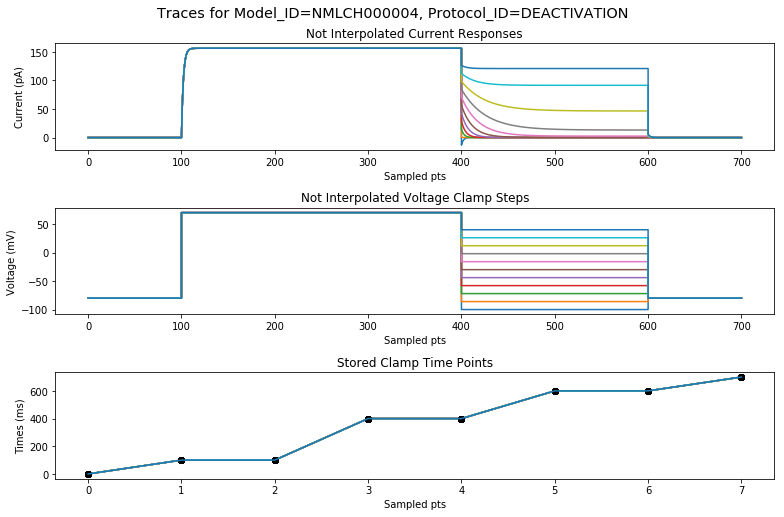

In [36]:
# show a specific example
protocol = 'DEACTIVATION'
model = 'NMLCH000004'

this_protocol_df = current_responses_df[current_responses_df['Protocol_ID']==protocol]
this_channel_protocol_df = this_protocol_df[this_protocol_df['Model_ID']==model]


fig,axes = plt.subplots(3,1,figsize=(11,7))

for i, (curr_times,curr_response,curr_clamp,clamp_times) in enumerate(zip(this_channel_protocol_df.Response_Times.values,this_channel_protocol_df.Response_Values.values,this_channel_protocol_df.Clamp_Values.values,this_channel_protocol_df.Clamp_Times.values)):
    
    
    if not i>0:
        total_response = curr_response
        total_clamp = curr_clamp
    else:
        total_response = np.concatenate((total_response,curr_response),axis=None)
        total_clamp = np.concatenate((total_clamp,curr_clamp),axis=None)
    
    axes[0].plot(curr_times,curr_response)
    axes[0].set_title('Not Interpolated Current Responses')
    axes[0].set_ylabel('Current (pA)')
    axes[0].set_xlabel('Sampled pts')

    axes[1].plot(clamp_times,curr_clamp)
    axes[1].set_title('Not Interpolated Voltage Clamp Steps')
    axes[1].set_ylabel('Voltage (mV)')
    axes[1].set_xlabel('Sampled pts')

    axes[2].plot(clamp_times,'ko')
    axes[2].plot(clamp_times)
    axes[2].set_title('Stored Clamp Time Points')
    axes[2].set_ylabel('Times (ms)')
    axes[2].set_xlabel('Sampled pts')

fig.tight_layout()
plt.suptitle('Traces for Model_ID=%s, Protocol_ID=%s' %(model,protocol),y=1.02,size='x-large');



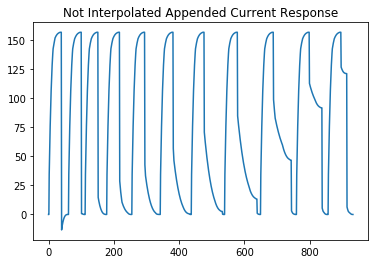

In [38]:
plt.plot(total_response)
plt.title('Not Interpolated Appended Current Response');



## Select interval of interest for each protocol type and voltage steps

<u>Objectives:</u>
> 1. Interpolate current responses based on clamp val and t points
    > linear interpolation seems to work fine for the sampling method Justas used
> 2. Define desired interval for each protocol
> 3. For desired interval, subsample the current response to a fixed amount
> 4. Append each subsampled current response into one long response for each protocol
> 5. Store and save in dataframe

In [39]:
from scipy.interpolate import interp1d

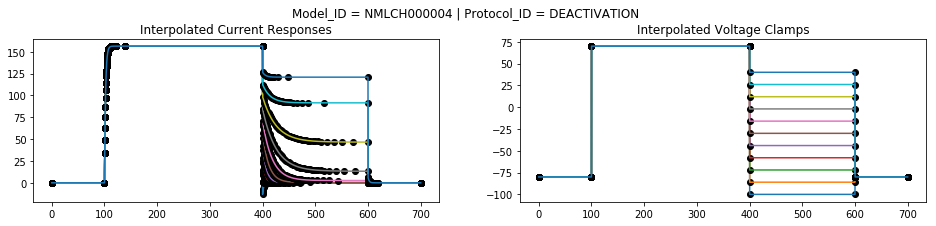

In [41]:
fig,axes = plt.subplots(1,2,figsize=(16,3))
shift = 0

for trace_id in range(11):

    dt = this_channel_protocol_df['Dt'].values[trace_id]
    t0 = this_channel_protocol_df['Start_Time'].values[trace_id]
    tf = this_channel_protocol_df['End_Time'].values[trace_id]

    num_pts = int(np.ceil((tf-t0)/dt))


    t_interp = np.linspace(t0,tf,num_pts)
    dt_interp = t_interp[1]-t_interp[0]

    curr_response = this_channel_protocol_df['Response_Values'].values[trace_id]
    curr_times = this_channel_protocol_df['Response_Times'].values[trace_id]

    clamp_vals = this_channel_protocol_df['Clamp_Values'].values[trace_id]
    clamp_times = this_channel_protocol_df['Clamp_Times'].values[trace_id]

    response_interp = interp1d(curr_times,curr_response,kind='linear')
    clamp_interp = interp1d(clamp_times,clamp_vals,kind='linear')

    axes[0].plot(curr_times,curr_response,'ko',t_interp,response_interp(t_interp),'-')
    # axes[0].set_ylim([-120,20]) # this agrees with image in database, note that on database you can't zoom in on the y axis, only x
    axes[0].set_title('Interpolated Current Responses')

    axes[1].plot(clamp_times,clamp_vals,'ko',t_interp,clamp_interp(t_interp),'-')
    axes[1].set_title('Interpolated Voltage Clamps')
    
    if np.max(curr_response)>shift:
        shift = np.max(curr_response)

plt.suptitle('Model_ID = %s | Protocol_ID = %s' %(model,protocol),y=1.03);



In [42]:
clamp_times



array([7.81250000e-03, 1.00000000e+02, 1.00015625e+02, 4.00000000e+02,
       4.00015625e+02, 6.00000000e+02, 6.00015625e+02, 7.00000000e+02])

In [43]:
t_interp



array([7.81250000e-03, 1.95313808e-02, 3.12502616e-02, ...,
       6.99976562e+02, 6.99988281e+02, 7.00000000e+02])

### Intervals of Interest - definitions

> - Activation = time of first current step to end of protocol = (T1,T1+T2+T3)
>    > This protocol has 3 step intervals corresponding to T1,T2 (graded activation), T3
> - Inactivation = time after initial Activation interval to end = (T1+T2,T1+T2+T3+T4)
>    > This protocol has 4 step intervals corresponding to T1,T2 (graded activation), T3 (deactivation), T4 (inactivation)
> - Deactvation = time between initial Activation and before Inactivation = (T1+T2,T1+T2+T3)
>    > This protocol only has 3 step intervals corresponding to T1,T2 (activation), T3 (graded deactivation), T4 (inactivation)
>
>

<b>Notes:</b>

> - T1,2,3,4 are stored in the "Clamp_Times" with one addition point, T0
> - This isn't exactly like the ICGeneology intervals. They make specific changes depending on the ion species
>> 1. Example: the intial activation interval point for NaV and CaV = T1 - 2 ms
>> 2. Example: the activation end points for KCa and Ih = (T1+T2+T3) - 95 ms

In [44]:
current_responses_df.head(33)



,Model_ID,Model_Name,Filename,Channel_Type,Protocol_ID,Start_Time,End_Time,Dt,Response_Type,Response_Values,Response_Times,Clamp_Label,Clamp_Values,Clamp_Times
0,NMLCH000001,Ih Hyperpolarization Activated Cation,hd.nml,Ih,ACTIVATION,0.007812,2130.0,0.011719,Current,"[0.0, 0.59555, 0.39411, 0.24755, 0.14718, 0.08...","[0.0078125, 0.015625, 4.234375, 9.15625, 15.06...",-150.0 mV,"[-40.003, -40.0, -150.0, -150.0, -40.014, -40....","[0.0078125, 100.0, 100.015625, 2100.0, 2100.00..."
1,NMLCH000001,Ih Hyperpolarization Activated Cation,hd.nml,Ih,ACTIVATION,0.007812,2130.0,0.011719,Current,"[0.0, 0.59555, 0.48659, 0.39411, 0.24755, 0.14...","[0.0078125, 0.015625, 2.0703125, 4.234375, 9.1...",-135.0 mV,"[-40.003, -40.0, -135.0, -135.0, -40.012, -40....","[0.0078125, 100.0, 100.015625, 2100.0, 2100.00..."
2,NMLCH000001,Ih Hyperpolarization Activated Cation,hd.nml,Ih,ACTIVATION,0.007812,2130.0,0.011719,Current,"[0.0, 0.59555, 0.48659, 0.39411, 0.31447, 0.24...","[0.0078125, 0.015625, 2.0703125, 4.234375, 6.5...",-120.0 mV,"[-40.003, -40.0, -120.0, -120.0, -40.01, -40.0...","[0.0078125, 100.0, 100.015625, 2100.0, 2100.00..."
3,NMLCH000001,Ih Hyperpolarization Activated Cation,hd.nml,Ih,ACTIVATION,0.007812,2130.0,0.011719,Current,"[0.0, 0.59555, 0.48659, 0.39411, 0.31447, 0.24...","[0.0078125, 0.015625, 2.0703125, 4.234375, 6.5...",-105.0 mV,"[-40.003, -40.0, -104.99, -105.0, -105.0, -40....","[0.0078125, 100.0, 100.0078125, 100.015625, 21..."
4,NMLCH000001,Ih Hyperpolarization Activated Cation,hd.nml,Ih,ACTIVATION,0.007812,2130.0,0.011719,Current,"[0.0, 0.59555, 0.48659, 0.39411, 0.31447, 0.24...","[0.0078125, 0.015625, 2.0703125, 4.234375, 6.5...",-90.0 mV,"[-40.003, -40.0, -89.994, -90.0, -90.0, -40.00...","[0.0078125, 100.0, 100.0078125, 100.015625, 21..."
5,NMLCH000001,Ih Hyperpolarization Activated Cation,hd.nml,Ih,ACTIVATION,0.007812,2130.0,0.011719,Current,"[0.0, 0.59555, 0.53733, 0.48659, 0.43857, 0.39...","[0.0078125, 0.015625, 1.0625, 2.0703125, 3.132...",-75.0 mV,"[-40.003, -40.0, -74.996, -75.0, -75.0, -40.00...","[0.0078125, 100.0, 100.0078125, 100.015625, 21..."
6,NMLCH000001,Ih Hyperpolarization Activated Cation,hd.nml,Ih,ACTIVATION,0.007812,2130.0,0.011719,Current,"[0.0, 0.59555, 0.59555, 0.57027, 0.54569, 0.52...","[0.0078125, 0.015625, 0.0234375, 0.4609375, 0....",-60.0 mV,"[-40.003, -40.0, -40.0, -59.997, -60.0, -60.0,...","[0.0078125, 0.0234375, 100.0, 100.0078125, 100..."
7,NMLCH000001,Ih Hyperpolarization Activated Cation,hd.nml,Ih,ACTIVATION,0.007812,2130.0,0.011719,Current,"[0.0, 0.59555, 0.59555, 0.5873, 0.57872, 0.570...","[0.0078125, 0.015625, 0.0234375, 0.1640625, 0....",-45.0 mV,"[-40.003, -40.0, -40.0, -40.0, -44.999, -45.0,...","[0.0078125, 0.015625, 0.0234375, 100.0, 100.00..."
8,NMLCH000001,Ih Hyperpolarization Activated Cation,hd.nml,Ih,ACTIVATION,0.007812,2130.0,0.011719,Current,"[0.0, 0.59555, 0.59555, 0.58322, 0.57115, 0.55...","[0.0078125, 0.015625, 0.0234375, 0.234375, 0.4...",-30.0 mV,"[-40.003, -40.0, -40.0, -40.0, -30.001, -30.0,...","[0.0078125, 0.015625, 0.0234375, 100.0, 100.00..."
9,NMLCH000001,Ih Hyperpolarization Activated Cation,hd.nml,Ih,ACTIVATION,0.007812,2130.0,0.011719,Current,"[0.0, 0.59555, 0.59555, 0.58684, 0.57827, 0.56...","[0.0078125, 0.015625, 0.0234375, 0.171875, 0.3...",-15.0 mV,"[-40.003, -40.0, -40.0, -15.003, -15.0, -15.0,...","[0.0078125, 0.0234375, 100.0, 100.0078125, 100..."


In [46]:
# regenerate the desired traces and subsample them
response_times,response_samples = get_sample_intervals_of_interest(current_responses_df)

# make new dataframe that will be source of PCA info
dropped_columns = ['Start_Time','End_Time','Dt','Response_Values','Response_Times','Clamp_Values','Clamp_Times']

interp_responses_df = current_responses_df.drop(labels=dropped_columns,axis='columns')

interp_responses_df['Response_Values'] = pd.Series([response for response in response_samples])
interp_responses_df['Response_Times'] = pd.Series([times for times in response_times])



In [47]:
interp_responses_df.tail()



,Model_ID,Model_Name,Filename,Channel_Type,Protocol_ID,Response_Type,Clamp_Label,Response_Values,Response_Times
94,NMLCH000004,KDr Delayed Rectifier Potassium,kdr.nml,Kv,INACTIVATION,Current,26.0 mV,"[91.522999948517, 94.92908173002927, 95.096051...","[1600.0, 1600.293542074364, 1600.587084148728,..."
95,NMLCH000004,KDr Delayed Rectifier Potassium,kdr.nml,Kv,INACTIVATION,Current,37.0 mV,"[115.93, 109.19213307240702, 109.0042661448140...","[1600.0, 1600.293542074364, 1600.587084148728,..."
96,NMLCH000004,KDr Delayed Rectifier Potassium,kdr.nml,Kv,INACTIVATION,Current,48.0 mV,"[132.13, 114.18247713929901, 113.8682270058707...","[1600.0, 1600.293542074364, 1600.587084148728,..."
97,NMLCH000004,KDr Delayed Rectifier Potassium,kdr.nml,Kv,INACTIVATION,Current,59.0 mV,"[144.88, 115.71763552216201, 115.3665849129371...","[1600.0, 1600.293542074364, 1600.587084148728,..."
98,NMLCH000004,KDr Delayed Rectifier Potassium,kdr.nml,Kv,INACTIVATION,Current,70.0 mV,"[156.44, 116.16805427873597, 115.8068837512703...","[1600.0, 1600.293542074364, 1600.587084148728,..."


In [48]:
# initialize dataframe for full appended current responses
columns = interp_responses_df.columns.values
appended_responses_df = pd.DataFrame(columns=columns)

appended_responses_df = appended_responses_df.drop(labels=['Model_Name','Filename','Response_Type','Clamp_Label','Response_Times'],axis='columns')
new_columns = appended_responses_df.columns.values

unique_models = np.unique(interp_responses_df['Model_ID'].values)

for model_id in unique_models:
    
    
    this_model_df = interp_responses_df[interp_responses_df['Model_ID']==model_id]
    unique_protocols = np.unique(this_model_df['Protocol_ID'].values)
    
    for protocol_id in unique_protocols:
        
        this_model_protocol_df = this_model_df[this_model_df['Protocol_ID']==protocol_id]
        
        channel_type = this_model_protocol_df['Channel_Type'].values
        
        for i, curr_response in enumerate(this_model_protocol_df.Response_Values.values):
            
            # check if negative deflection from baseline (first point)
            curr_min = np.min(curr_response)
            
            # Need activation response to get steady state response
            if curr_min < curr_response[-1]: 
                curr_response*=-1 # reverse inward current
            
            # if first current response start total response
            if not i>0:
                total_response = curr_response
            else:
                total_response = np.concatenate((total_response,curr_response),axis=None)
                
                
        # make temp dataframe for this appended response
        df = pd.DataFrame(columns=new_columns)
        df['Model_ID'] = pd.Series(model_id)
        df['Protocol_ID'] = pd.Series(protocol_id)
        df['Channel_Type'] = pd.Series(channel_type)
        df['Response_Values'] = pd.Series([total_response])
        
        join_frames = [appended_responses_df,df]
        appended_responses_df = pd.concat(join_frames,ignore_index=True)
        
        

In [53]:
appended_responses_df.tail()



,Model_ID,Channel_Type,Protocol_ID,Response_Values
4,NMLCH000003,Kv,DEACTIVATION,"[-0.00955135415236788, 0.05282497027886956, 0...."
5,NMLCH000003,Kv,INACTIVATION,"[-0.14083000405914758, -2.730587769080604, -4...."
6,NMLCH000004,Kv,ACTIVATION,"[-0.00018988888806591983, -0.00018988887067244..."
7,NMLCH000004,Kv,DEACTIVATION,"[-156.44, 11.043084393346437, 9.1013308857314,..."
8,NMLCH000004,Kv,INACTIVATION,"[-0.11927999667398033, -2.661639898699618, -5...."


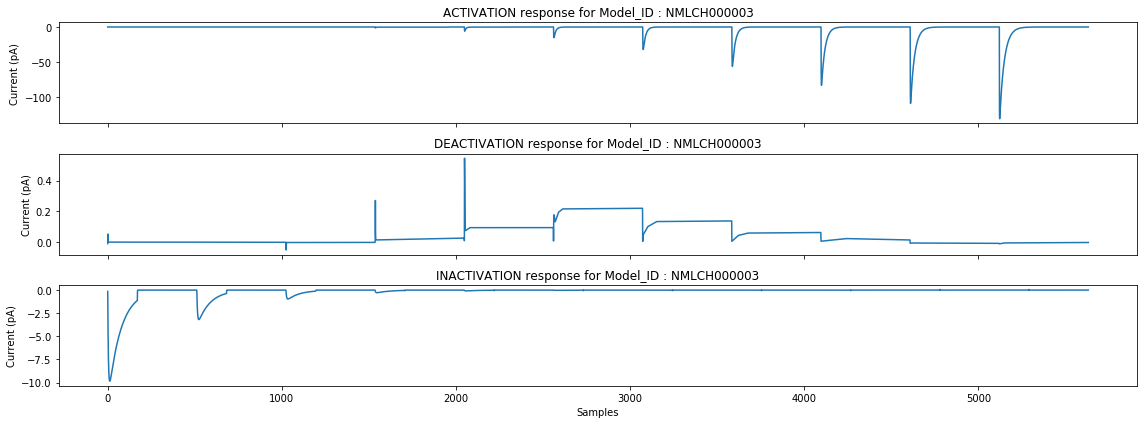

In [50]:
# Example of what appended responses look like
fig, axes = plt.subplots(3,1,figsize=(16,6),sharex=True)

plot_this = 3
axes[0].plot(appended_responses_df.Response_Values.values[plot_this])
axes[0].set_title('%s response for Model_ID : %s' %(appended_responses_df.Protocol_ID.values[plot_this],appended_responses_df.Model_ID.values[plot_this]))
axes[0].set_ylabel('Current (pA)')

plot_this = 4
axes[1].plot(appended_responses_df.Response_Values.values[plot_this])
axes[1].set_title('%s response for Model_ID : %s' %(appended_responses_df.Protocol_ID.values[plot_this],appended_responses_df.Model_ID.values[plot_this]))
axes[1].set_ylabel('Current (pA)')

plot_this = 5
axes[2].plot(appended_responses_df.Response_Values.values[plot_this])
axes[2].set_title('%s response for Model_ID : %s' %(appended_responses_df.Protocol_ID.values[plot_this],appended_responses_df.Model_ID.values[plot_this]))
axes[2].set_ylabel('Current (pA)')

axes[2].set_xlabel('Samples')
fig.tight_layout();




## Repeat above for all channel models then perform agglomerative clustering

<u>Objectives</u>:
> 1. Gather all channel models in database
> 2. Create appended response dataframe
> 3. Normalize each appended response
> 4. Perform PCA for dimensionality reduction
> 5. Perform hierarchical clustering

In [52]:
channel_tags_df = temp_tags_df.copy()
channel_tags_df.tail()



,Model_ID,Model_Name,Filename
178,NMLCH001638,IA A-Type Potassium,KvAproxp.channel.nml
179,NMLCH001639,KCa AHP Type Calcium Dependent Potassium,KvCaB.channel.nml
180,NMLCH001641,Na Sodium,Navbis.channel.nml
181,NMLCH001645,Na Sodium,Navapicalp.channel.nml
182,NMLCH001649,Ih Hyperpolarization Activated Cation (HCN),HCNsomap.channel.nml


## Actual data wrangling pipeline (Repeat of above but more concise)

Essentially the same as <b>utils/run_channel_wrangling.py</b>

In [4]:
# load if already saved dataframes
filename = os.path.join(path2data,'channel_tags.csv')
channel_tags_df = pd.read_csv(filename)

filename = os.path.join(path2data,'current_responses.pkl')
current_responses_df = pd.read_pickle(filename)


# need to remake this with negative deflection correction
filename = os.path.join(path2data,'updated_appended_responses.pkl')
appended_responses_df = pd.read_pickle(filename)



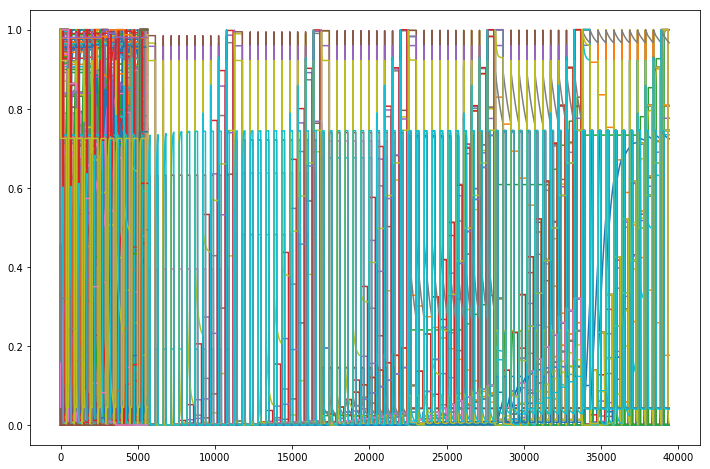

In [6]:
fig = plt.figure(figsize=(12,8))
for i, df_row in appended_responses_df.iterrows():
    

    plt.plot(df_row["Response_Values"])

        


In [82]:
current_responses_df.tail(1)

,Model_ID,Model_Name,Filename,Channel_Type,Protocol_ID,Start_Time,End_Time,Dt,Response_Type,Response_Values,Response_Times,Clamp_Label,Clamp_Values,Clamp_Times
9206,NMLCH001649,Ih Hyperpolarization Activated Cation (HCN),HCNsomap.channel.nml,Ih,INACTIVATION,0.007812,1500.0,0.011719,Current,"[-0.0, 0.35506, 0.25941, 0.18363, 0.12492, 0.0...","[0.0078125, 0.015625, 3.1171875, 6.5625, 10.47...",-40.0 mV,"[-40.003, -40.0, -120.0, -120.0, -40.0, -40.0]","[0.0078125, 1100.0, 1100.015625, 1400.0, 1400...."


In [115]:
appended_responses_df.tail()

,Model_ID,Channel_Type,Protocol_ID,Response_Values
544,NMLCH001645,Na,DEACTIVATION,"[0.980273287528, 0.987914624067, 0.98041492082..."
545,NMLCH001645,Na,INACTIVATION,"[0.00268321237056, 0.456315692599, 0.252443522..."
546,NMLCH001649,Ih,ACTIVATION,"[0.0453031851075, 0.584062451238, 0.8195470924..."
547,NMLCH001649,Ih,DEACTIVATION,"[1.0, 0.160135104579, 0.24171943759, 0.2820874..."
548,NMLCH001649,Ih,INACTIVATION,"[1.0, 0.7270812612, 0.726978985688, 0.72687671..."


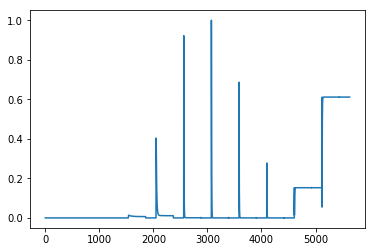

In [116]:
plt.plot(appended_responses_df['Response_Values'].iloc[543])

In [90]:
# save everything before moving on
filename = os.path.join(path2save,'channel_tags.csv')
channel_tags_df.to_csv(filename)

filename = os.path.join(path2save,'current_responses.pkl')
current_responses_df.to_pickle(filename)

filename = os.path.join(path2save,'appended_responses.pkl')
appended_responses_df.to_pickle(filename)

In [7]:
np.unique(appended_responses_df.Channel_Type).tolist()

[u'Cav', u'Ih', u'KCa', u'Kca', u'Kv', u'Na', u'pas']

Use when I can actually get real Channel_Type

In [8]:
# tag broad class of channels and group
channel_classes = np.unique(appended_responses_df.Channel_Type).tolist()
response_lengths = np.zeros(len(channel_classes))

# separate channel-type specific
for i, channel_type in enumerate(channel_classes):
    
    channel_df = appended_responses_df[appended_responses_df['Channel_Type']==channel_type]
    
    # grab length of first one
    length = len(channel_df.iloc[0].Response_Values)
    
    # update length
    response_lengths[i] = length
    

In [13]:
# construct the channel-type specific PCA matrices

# Cav
columns = []
for i in range(int(response_lengths[0])):
    columns.append(str(i))

columns.append('Model_ID')
columns.append('Protocol_ID')

cav_pca_df = pd.DataFrame(columns=columns)


# Ih
columns = []
for i in range(int(response_lengths[1])):
    columns.append(str(i))

columns.append('Model_ID')
columns.append('Protocol_ID')

ih_pca_df = pd.DataFrame(columns=columns)


# KCa
columns = []
for i in range(int(response_lengths[2])):
    columns.append(str(i))

columns.append('Model_ID')
columns.append('Protocol_ID')

kca_pca_df = pd.DataFrame(columns=columns)

# Kca - skip this

# Kv
columns = []
for i in range(int(response_lengths[4])):
    columns.append(str(i))

columns.append('Model_ID')
columns.append('Protocol_ID')

kv_pca_df = pd.DataFrame(columns=columns)


# Nav
columns = []
for i in range(int(response_lengths[5])):
    columns.append(str(i))

columns.append('Model_ID')
columns.append('Protocol_ID')

nav_pca_df = pd.DataFrame(columns=columns)






In [10]:
def update_channel_pca_df(pca_df,responses_df):
    
    columns = pca_df.columns.values
    
    # insert time series values as desired features in dataframe object
    for channel_idx, curr_response in enumerate(responses_df.Response_Values.values):

        df = pd.DataFrame(columns=columns)

        desired_row = curr_response

        desired_row.append(responses_df.iloc[channel_idx]['Model_ID'])
        desired_row.append(responses_df.iloc[channel_idx]['Protocol_ID'])


        # insert row 
        try:
            df.loc[0] = desired_row

        # length should be maintained so ignore others (temp soln)
        except ValueError:
            
            # skip
            continue


        # update pca dataframe
        join_frames = [pca_df,df]
        pca_df = pd.concat(join_frames,ignore_index=True)
    
    
    return pca_df
    

In [14]:
# only calcium voltage-gated channels
cav_responses_df = appended_responses_df[appended_responses_df['Channel_Type']=='Cav']
cav_pca_df = update_channel_pca_df(pca_df=cav_pca_df,responses_df=cav_responses_df)

# only H-type current channels
ih_responses_df = appended_responses_df[appended_responses_df['Channel_Type']=='Ih']
ih_pca_df = update_channel_pca_df(pca_df=ih_pca_df,responses_df=ih_responses_df)

# only calcium-dependent potassium channels
kca_responses_df = appended_responses_df[appended_responses_df['Channel_Type'].isin(['KCa','Kca'])]
kca_pca_df = update_channel_pca_df(pca_df=kca_pca_df,responses_df=kca_responses_df)

# only potassium voltage-gated channels
kv_responses_df = appended_responses_df[appended_responses_df['Channel_Type']=='Kv']
kv_pca_df = update_channel_pca_df(pca_df=kv_pca_df,responses_df=kv_responses_df)

# only sodium voltage-gated channels
nav_responses_df = appended_responses_df[appended_responses_df['Channel_Type']=='Na']
nav_pca_df = update_channel_pca_df(pca_df=nav_pca_df,responses_df=nav_responses_df)

In [15]:
# save everything before moving on
filename = os.path.join(path2data,'norm_cav_responses.csv')
cav_pca_df.to_csv(filename)

filename = os.path.join(path2data,'norm_ih_responses.csv')
ih_pca_df.to_csv(filename)

filename = os.path.join(path2data,'norm_kca_responses.csv')
kca_pca_df.to_csv(filename)

filename = os.path.join(path2data,'norm_kv_responses.csv')
kv_pca_df.to_csv(filename)

filename = os.path.join(path2data,'norm_nav_responses.csv')
nav_pca_df.to_csv(filename)